In [16]:
# Test migration history reconstruction on ovarian cancer data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)

from src.lib import vertex_labeling

from src.util import data_extraction_util as data_util
from src.util import pairtree_data_extraction_util as pt_util
from src.util import vertex_labeling_util as vert_util
from src.util.plotting_util import PrintConfig

import matplotlib
import torch
import numpy as np

MCPHERSON_DATA_DIR = os.path.join(repo_dir, 'src/data/mcpherson_ovarian_2016')
MSK_MET_FN = os.path.join(repo_dir, 'src/data/msk_met/msk_met_freq_one_met_patients.csv')
PT_DIR = os.path.join(MCPHERSON_DATA_DIR, "pairtree_tree_inference/pairtree_clustering")                 
# HOAD_MSK_MET_MAP = {
#     "liver": "Liver",
#     "brain": "CNS/Brain",
#     "rib": "Bone",
#     "breast": "Breast",
#     "kidney": "Kidney",
#     "lung": "Lung",
#     "adrenal": "Adrenal Gland",
#     "spinal": "CNS/Brain"
# }

In [17]:

def find_labeling(tree_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    print(cluster_label_to_idx)
   
    tree, pruned_cluster_label_to_idx = data_util.get_adj_matrix_from_machina_tree(cluster_label_to_idx, tree_fn, skip_polytomies=False)

    T = torch.tensor(tree, dtype = torch.float32)
    B = vert_util.get_mutation_matrix_tensor(T)
    
    idx_to_label = {v:k for k,v in pruned_cluster_label_to_idx.items()}
    print(idx_to_label)

    print(unique_sites)   
    primary_idx = unique_sites.index('breast')
    r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
    O = data_util.get_organotropism_matrix(unique_sites, HOAD_MSK_MET_MAP, MSK_MET_FN)
    print("O", O)
    weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=1.0, gen_dist=0.0, organotrop=0.5)
    print_config = PrintConfig(visualize=True, verbose=True, viz_intermeds=False)
    vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                O=O, weights=weights, print_config=print_config, p=r, 
                                                node_idx_to_label=idx_to_label, batch_size=32, init_temp=30, 
                                                final_temp=0.01, max_iter=300, custom_colors=custom_colors, 
                                                primary="breast")


        

In [27]:
patient_id = 2
with np.load(os.path.join(PT_DIR, f"patient{patient_id}.results.npz"),allow_pickle=True) as data:
    parents = data['struct']
    print(data.files)
T = pt_util.get_adj_matrix_from_pairtree_tree(parents[0])
T = torch.tensor(T, dtype = torch.float32)
print(T.shape)
print(T)
ref_var_fn = os.path.join(PT_DIR, f"patient{patient_id}_clustered_0.95.tsv")
ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
print(ref_matrix.shape)
print(var_matrix.shape)
print(unique_sites)
print(cluster_label_to_idx)


['accept_rate.json', 'struct', 'count', 'phi', 'llh', 'prob', 'sampnames.json', 'clustrel_posterior_vids.json', 'clustrel_posterior_rels', 'clustrel_evidence_vids.json', 'clustrel_evidence_rels', 'clusters.json', 'garbage.json', 'seed.json']
torch.Size([21, 21])
tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0.,

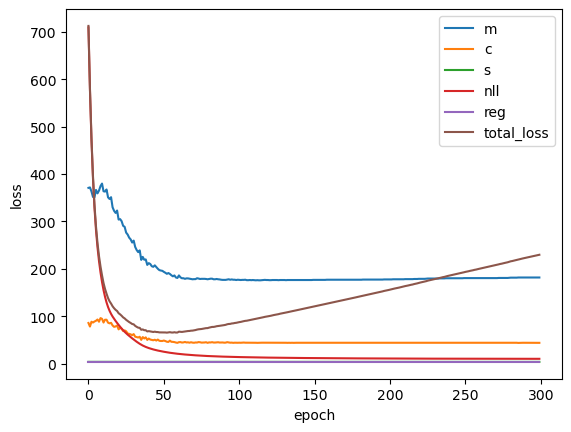

17:37:02 DEBUG

U > 0.05

17:37:02 DEBUG
                    norm  17:72584764  10:99220707  10:99225738;10:103338730  \
omentum_site_1     0.000        0.000        0.000                     0.466   
omentum_site_2     0.000        0.094        0.000                     0.089   
right_ovary_site_1 0.000        0.000        0.000                     0.000   
right_ovary_site_2 0.000        0.087        0.000                     0.000   

                    8:75447378  OR5B3:11:58169959;DYNC2H1:11:103126148  \
omentum_site_1           0.000                                   0.000   
omentum_site_2           0.132                                   0.000   
right_ovary_site_1       0.000                                   0.000   
right_ovary_site_2       0.000                                   0.000   

                    SI:3:164716339  13:70753966;X:5821358  \
omentum_site_1               0.000                  0.000   
omentum_site_2               0.148                  0.000   
righ

Time elapsed: 16.64484
print_config.k_best_trees 1
****************************** BEST TREE ******************************

Migration number: 15.0
Comigration number: 8.0
Seeding site number: 4.0
Neg log likelihood: 10.475
Reg: 4.0
Loss: 208.475


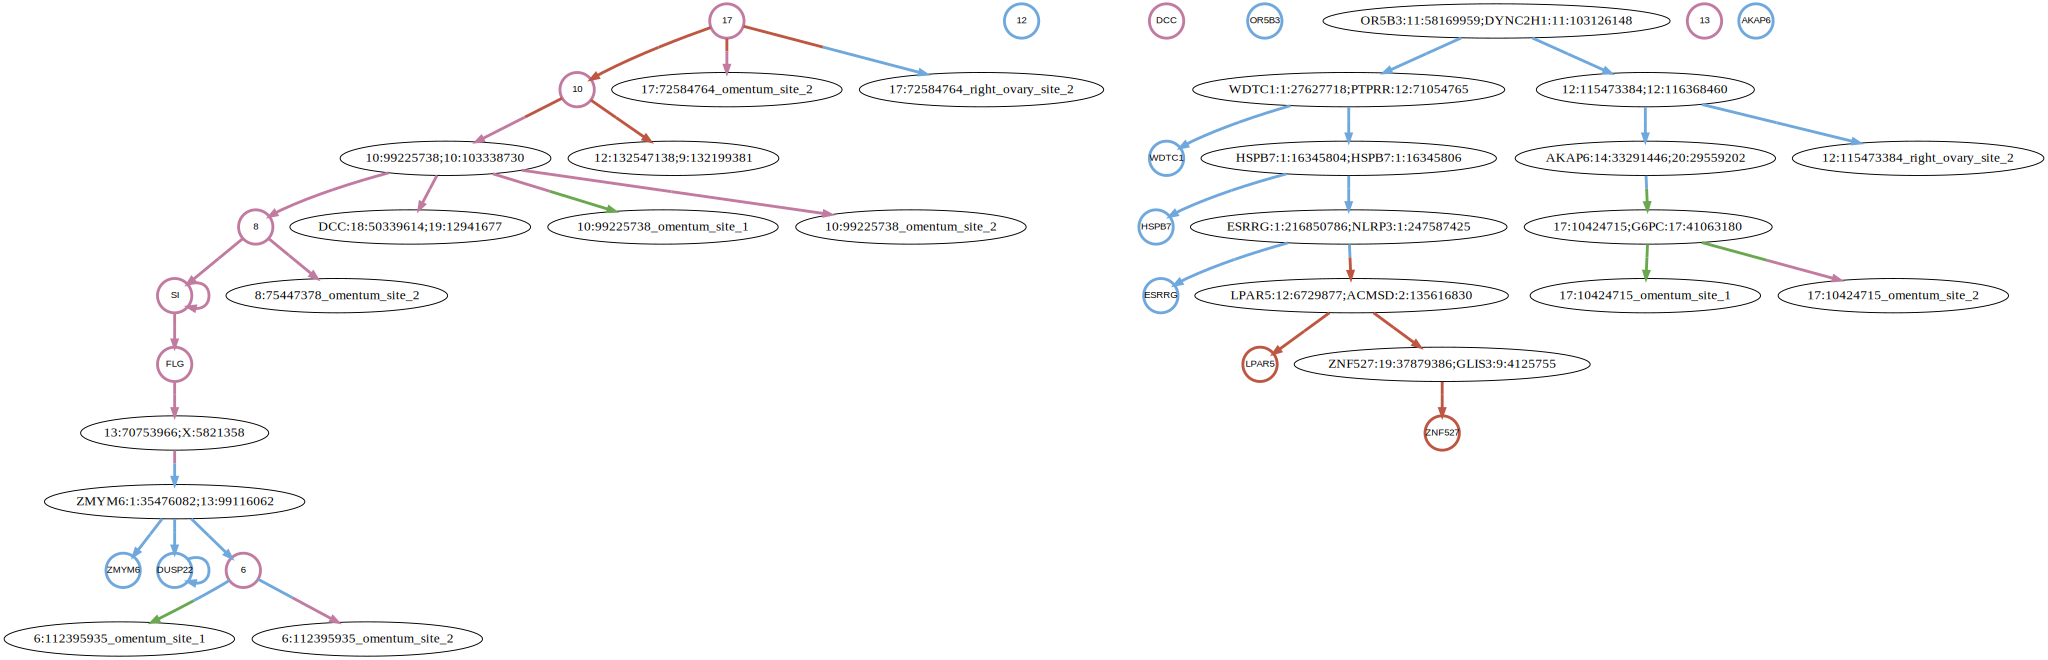

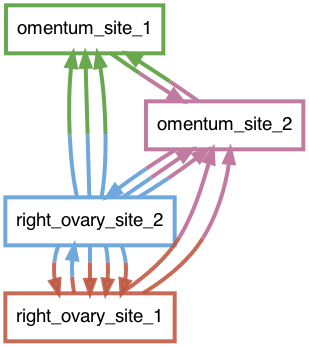

17:37:03 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


17:72584764 10:99220707 0.031249999534338713 2.0
17:72584764 17:72584764_omentum_site_2 0.031249999534338713 2.0
17:72584764 17:72584764_right_ovary_site_2 0.031249999534338713 2.0
10:99220707 10:99225738;10:103338730 0.031249999534338713 2.0
10:99220707 12:132547138;9:132199381 0.031249999534338713 2.0
10:99225738;10:103338730 8:75447378 0.031249999534338713 2.0
10:99225738;10:103338730 DCC:18:50339614;19:12941677 0.031249999534338713 2.0
10:99225738;10:103338730 10:99225738_omentum_site_1 0.031249999534338713 2.0
10:99225738;10:103338730 10:99225738_omentum_site_2 0.031249999534338713 2.0
8:75447378 SI:3:164716339 0.031249999534338713 2.0
8:75447378 8:75447378_omentum_site_2 0.031249999534338713 2.0
OR5B3:11:58169959;DYNC2H1:11:103126148 WDTC1:1:27627718;PTPRR:12:71054765 0.031249999534338713 2.0
OR5B3:11:58169959;DYNC2H1:11:103126148 12:115473384;12:116368460 0.031249999534338713 2.0
SI:3:164716339 FLG:1:152286805 0.031249999534338713 2.0
SI:3:164716339 SI:3:164716339_omentum_site_2

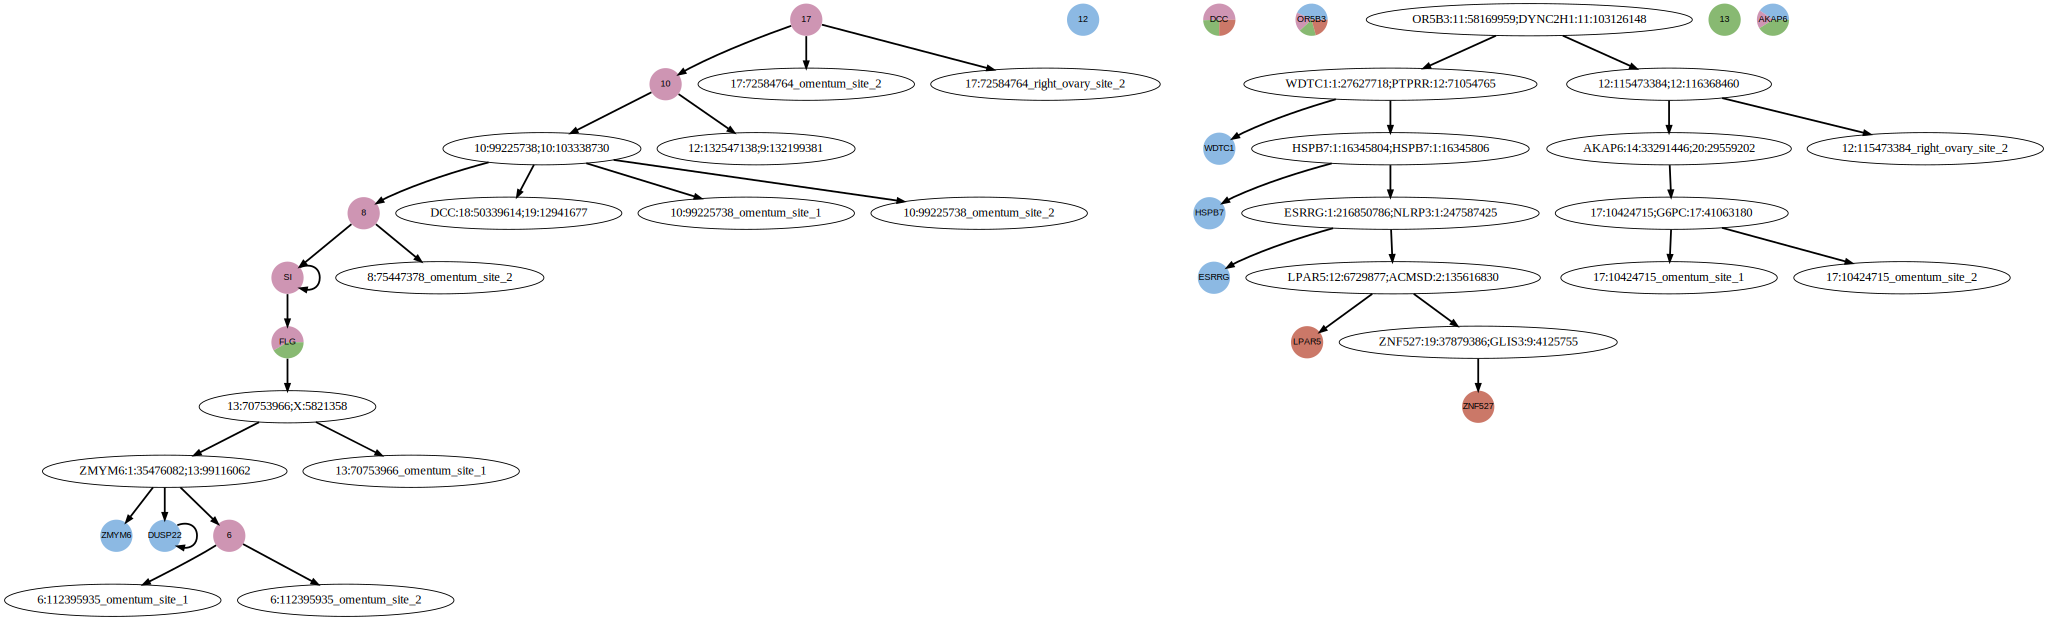

([('17:72584764', '10:99220707'),
  ('17:72584764', '17:72584764_omentum_site_2'),
  ('17:72584764', '17:72584764_right_ovary_site_2'),
  ('10:99220707', '10:99225738;10:103338730'),
  ('10:99220707', '12:132547138;9:132199381'),
  ('10:99225738;10:103338730', '8:75447378'),
  ('10:99225738;10:103338730', 'DCC:18:50339614;19:12941677'),
  ('10:99225738;10:103338730', '10:99225738_omentum_site_1'),
  ('10:99225738;10:103338730', '10:99225738_omentum_site_2'),
  ('8:75447378', 'SI:3:164716339'),
  ('8:75447378', '8:75447378_omentum_site_2'),
  ('OR5B3:11:58169959;DYNC2H1:11:103126148',
   'WDTC1:1:27627718;PTPRR:12:71054765'),
  ('OR5B3:11:58169959;DYNC2H1:11:103126148', '12:115473384;12:116368460'),
  ('SI:3:164716339', 'FLG:1:152286805'),
  ('SI:3:164716339', 'SI:3:164716339_omentum_site_2'),
  ('13:70753966;X:5821358', 'ZMYM6:1:35476082;13:99116062'),
  ('ZMYM6:1:35476082;13:99116062', 'DUSP22:6:298732'),
  ('ZMYM6:1:35476082;13:99116062', '6:112395935'),
  ('ZMYM6:1:35476082;13:99116

In [25]:
primary_idx = unique_sites.index('right_ovary_site_1')
B = vert_util.get_mutation_matrix_tensor(T)
    
idx_to_label = {v:k for k,v in cluster_label_to_idx.items()}
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=1.0, gen_dist=0.0, organotrop=0.0)
print_config = vert_util.PrintConfig(visualize=True, verbose=True, viz_intermeds=False)
vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                            weights=weights, print_config=print_config, p=r, 
                                            node_idx_to_label=idx_to_label, batch_size=32, init_temp=30, 
                                            final_temp=0.01, max_iter=300, custom_colors=custom_colors, 
                                            primary="right_ovary_site_1")
